# Agregación de datos por categoría

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
gender = ['Male', 'Female']
income = ['Poor', 'Middle Class', 'Rich']

In [3]:
n = 500
gender_data = []
income_data = []

for i in range(n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
income_data[:10]

['Middle Class',
 'Poor',
 'Poor',
 'Rich',
 'Poor',
 'Rich',
 'Poor',
 'Middle Class',
 'Poor',
 'Poor']

In [5]:
# Z -> N(0, 1)
# N(m, s) -> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [6]:
data = pd.DataFrame(
    {
        'Gender' : gender_data,
        'Economic Status' : income_data,
        'Height' : height,
        'Weight' : weight,
        'Age' : np.floor(age).astype(int), # Redondear a la baja y convertir a tipo int
        'Income' : income
    }
)

In [7]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,193.605662,54.713375,43,18903.793479
1,Male,Poor,202.152690,35.256801,19,21288.668705
2,Female,Poor,173.333559,64.405136,31,20919.453787
3,Female,Rich,143.110183,77.174613,12,18106.279328
4,Male,Poor,211.247481,42.979382,37,19075.194084


## Agrupación de datos

In [8]:
grouped_gender = data.groupby('Gender')

In [9]:
grouped_gender.groups

{'Female': [0, 2, 3, 6, 7, 9, 10, 12, 13, 14, 15, 16, 22, 23, 24, 26, 27, 30, 31, 32, 34, 36, 37, 38, 40, 41, 42, 43, 48, 50, 52, 53, 55, 60, 62, 63, 65, 66, 67, 70, 71, 73, 76, 78, 81, 83, 84, 90, 92, 95, 100, 102, 104, 107, 113, 117, 118, 122, 134, 135, 138, 139, 140, 142, 143, 146, 152, 154, 155, 158, 160, 161, 162, 164, 165, 167, 169, 170, 171, 174, 175, 176, 180, 181, 184, 188, 190, 191, 194, 195, 197, 202, 203, 205, 207, 209, 210, 212, 214, 216, ...], 'Male': [1, 4, 5, 8, 11, 17, 18, 19, 20, 21, 25, 28, 29, 33, 35, 39, 44, 45, 46, 47, 49, 51, 54, 56, 57, 58, 59, 61, 64, 68, 69, 72, 74, 75, 77, 79, 80, 82, 85, 86, 87, 88, 89, 91, 93, 94, 96, 97, 98, 99, 101, 103, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 136, 137, 141, 144, 145, 147, 148, 149, 150, 151, 153, 156, 157, 159, 163, 166, 168, 172, 173, 177, 178, 179, 182, 183, ...]}

In [10]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight  Age        Income
0    Female    Middle Class  193.605662  54.713375   43  18903.793479
2    Female            Poor  173.333559  64.405136   31  20919.453787
3    Female            Rich  143.110183  77.174613   12  18106.279328
6    Female            Poor  130.704904  36.568294   44  18951.996901
7    Female    Middle Class  151.017526  49.880152   22  20085.428131
..      ...             ...         ...        ...  ...           ...
490  Female            Poor  158.637131  87.500072   33  18626.373487
491  Female    Middle Class  110.490376  98.675756   45  19299.888042
497  Female    Middle Class  181.853749  78.636957   33  19365.990570
498  Female    Middle Class  142.057223  91.065387   37  19506.824333
499  Female            Rich  171.293879  72.436012   36  19669.540561

[249 rows x 6 columns]
Male
    Gender Economic Status      Height     Weight  Age        Income
1     Male            Poor  202.152690  35.256801   19 

In [11]:
grouped_gender.get_group('Female')

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,193.605662,54.713375,43,18903.793479
2,Female,Poor,173.333559,64.405136,31,20919.453787
3,Female,Rich,143.110183,77.174613,12,18106.279328
6,Female,Poor,130.704904,36.568294,44,18951.996901
7,Female,Middle Class,151.017526,49.880152,22,20085.428131
...,...,...,...,...,...,...
490,Female,Poor,158.637131,87.500072,33,18626.373487
491,Female,Middle Class,110.490376,98.675756,45,19299.888042
497,Female,Middle Class,181.853749,78.636957,33,19365.990570
498,Female,Middle Class,142.057223,91.065387,37,19506.824333


In [12]:
double_group = data.groupby(['Gender', 'Economic Status'])

In [13]:
len(double_group) # 6 grupos, para cada uno de los generos y para cada estado economico

6

In [14]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight  Age        Income
0    Female    Middle Class  193.605662  54.713375   43  18903.793479
7    Female    Middle Class  151.017526  49.880152   22  20085.428131
15   Female    Middle Class  207.462439  72.168026   23  19945.276368
23   Female    Middle Class  154.711296  97.403594   23  20718.340778
37   Female    Middle Class  175.411068  77.741286   50  18685.701099
..      ...             ...         ...        ...  ...           ...
484  Female    Middle Class  130.069096  69.034502   31  20809.995103
488  Female    Middle Class  158.501867  95.615225   33  19477.971831
491  Female    Middle Class  110.490376  98.675756   45  19299.888042
497  Female    Middle Class  181.853749  78.636957   33  19365.990570
498  Female    Middle Class  142.057223  91.065387   37  19506.824333

[76 rows x 6 columns]
('Female', 'Poor')
     Gender Economic Status      Height      Weight  Age        Income
2    Female         

## Operaciones sobre datos agrupados

In [15]:
double_group.sum()

Height       Weight   Age        Income
Gender Economic Status                                               
Female Middle Class     12267.057601  5095.141958  2462  1.495860e+06
       Poor             13635.457175  5708.283382  2543  1.707396e+06
       Rich             13801.086443  5883.285752  2517  1.687248e+06
Male   Middle Class     15585.636996  5766.377217  2805  1.916745e+06
       Poor             13129.823209  4691.668642  2251  1.553989e+06
       Rich             12291.563589  5342.136023  2042  1.478378e+06

In [16]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     161.408653  67.041342  32.394737  19682.366293
       Poor             156.729393  65.612453  29.229885  19625.246503
       Rich             160.477749  68.410299  29.267442  19619.161763
Male   Middle Class     160.676670  59.447188  28.917526  19760.255584
       Poor             166.200294  59.388211  28.493671  19670.749310
       Rich             163.887515  71.228480  27.226667  19711.702657

In [17]:
double_group.size()

Gender  Economic Status
Female  Middle Class       76
        Poor               87
        Rich               86
Male    Middle Class       97
        Poor               79
        Rich               75
dtype: int64

In [18]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      76.0  161.408653  30.322773   97.239564  138.198834   
       Poor              87.0  156.729393  34.575251   87.123052  133.286980   
       Rich              86.0  160.477749  29.542754   95.330946  140.418216   
Male   Middle Class      97.0  160.676670  30.106993   95.005992  137.505512   
       Poor              79.0  166.200294  28.627486  108.722459  144.196755   
       Rich              75.0  163.887515  29.785927  103.171401  140.818611   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     160.603240  180.923737  216.167392   76.0  67.041342   
       Poor             149.815763  176.538704  273.006760   87.0  65.612453   
       Rich             164.062074  178.434420  220.266278   86.0  68.410299   
Male   Middle Class     160.869365  181.537394  235.173046   97.0  59.447188   
       Poor             166.872585  184.955113  238.345174   79.0  59.388211   
       Rich             167.964410  184.974976  232.551426   75.0  71.228480   

                        ...   Age       Income                             \
                        ...   75%   max  count          mean          std   
Gender Economic Status  ...                                                 
Female Middle Class     ...  42.0  59.0   76.0  19682.366293   918.943340   
       Poor             ...  36.0  49.0   87.0  19625.246503   992.260128   
       Rich             ...  37.0  51.0   86.0  19619.161763  1006.062204   
Male   Middle Class     ...  36.0  56.0   97.0  19760.255584  1072.906879   
       Poor             ...  35.5  49.0   79.0  19670.749310  1027.648631   
       Rich             ...  36.0  52.0   75.0  19711.702657  1004.776552   

                                                                  \
                                 min           25%           50%   
Gender Economic Status                                             
Female Middle Class     18064.137091  18897.803392  19605.008375   
       Poor             18003.594493  18815.671859  19684.939274   
       Rich             18025.016724  18761.230080  19395.828782   
Male   Middle Class     18023.507753  18681.169337  19889.533594   
       Poor             18023.252200  18702.174187  19615.958244   
       Rich             18042.852665  18864.756883  19646.594306   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20433.757544  21370.682151  
       Poor             20421.916687  21400.993200  
       Rich             20622.289216  21439.023529  
Male   Middle Class     20610.556394  21464.271780  
       Poor             20595.537114  21477.414039  
       Rich             20491.736708  21410.947563  

[6 rows x 32 columns]

In [19]:
grouped_income = double_group['Income']

In [20]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      76.0  19682.366293   918.943340  18064.137091   
       Poor              87.0  19625.246503   992.260128  18003.594493   
       Rich              86.0  19619.161763  1006.062204  18025.016724   
Male   Middle Class      97.0  19760.255584  1072.906879  18023.507753   
       Poor              79.0  19670.749310  1027.648631  18023.252200   
       Rich              75.0  19711.702657  1004.776552  18042.852665   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     18897.803392  19605.008375  20433.757544  21370.682151  
       Poor             18815.671859  19684.939274  20421.916687  21400.993200  
       Rich             18761.230080  19395.828782  20622.289216  21439.023529  
Male   Middle Class     18681.169337  19889.533594  20610.556394  21464.271780  
       Poor             18702.174187  19615.958244  20595.537114  21477.414039  
       Rich             18864.756883  19646.594306  20491.736708  21410.947563

In [21]:
double_group.aggregate(
    {
        'Income' : np.sum,
        'Age' : np.mean,
        'Height' : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.495860e+06  32.394737  30.322773
       Poor             1.707396e+06  29.229885  34.575251
       Rich             1.687248e+06  29.267442  29.542754
Male   Middle Class     1.916745e+06  28.917526  30.106993
       Poor             1.553989e+06  28.493671  28.627486
       Rich             1.478378e+06  27.226667  29.785927

In [22]:
double_group.aggregate(
    {
        'Age' : np.mean,
        'Height' : lambda h: np.mean(h)/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     32.394737  5.358387
       Poor             29.229885  4.559272
       Rich             29.267442  5.463911
Male   Middle Class     28.917526  5.364580
       Poor             28.493671  5.842717
       Rich             27.226667  5.539232

In [23]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     12267.057601  161.408653  30.322773  5095.141958   
       Poor             13635.457175  156.729393  34.575251  5708.283382   
       Rich             13801.086443  160.477749  29.542754  5883.285752   
Male   Middle Class     15585.636996  160.676670  30.106993  5766.377217   
       Poor             13129.823209  166.200294  28.627486  4691.668642   
       Rich             12291.563589  163.887515  29.785927  5342.136023   

                                               Age                        \
                             mean        std   sum       mean        std   
Gender Economic Status                                                     
Female Middle Class     67.041342  25.541043  2462  32.394737  13.039508   
       Poor             65.612453  26.168220  2543  29.229885   9.412635   
       Rich             68.410299  25.914044  2517  29.267442  10.074341   
Male   Middle Class     59.447188  27.310978  2805  28.917526  11.262650   
       Poor             59.388211  25.702895  2251  28.493671   9.805641   
       Rich             71.228480  24.561797  2042  27.226667  11.558983   

                              Income                             
                                 sum          mean          std  
Gender Economic Status                                           
Female Middle Class     1.495860e+06  19682.366293   918.943340  
       Poor             1.707396e+06  19625.246503   992.260128  
       Rich             1.687248e+06  19619.161763  1006.062204  
Male   Middle Class     1.916745e+06  19760.255584  1072.906879  
       Poor             1.553989e+06  19670.749310  1027.648631  
       Rich             1.478378e+06  19711.702657  1004.776552

In [24]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.358387  2.642289  2.500860  21.560793
       Poor             4.559272  2.521869  3.123390  19.892986
       Rich             5.463911  2.655376  2.922186  19.615319
Male   Middle Class     5.364580  2.187985  2.580898  18.513170
       Poor             5.842717  2.325329  2.924413  19.263824
       Rich             5.539232  2.919499  2.371317  19.750105

## Filtrado de datos

In [25]:
double_group['Age'].filter(lambda x: x.sum() > 2400)

0      43
2      31
3      12
6      44
7      22
       ..
492    36
494    16
497    33
498    37
499    36
Name: Age, Length: 346, dtype: int32

## Transformación de variables

In [26]:
zscore = lambda x: (x - x.mean())/x.std()

In [27]:
z_group = double_group.transform(zscore)

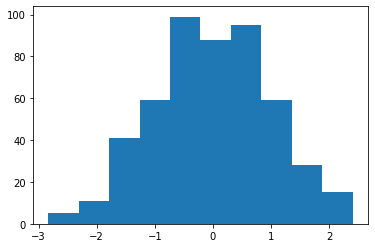

In [28]:
plt.hist(z_group['Age'])
plt.show()

In [29]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [30]:
double_group.transform(fill_na_mean) # En el caso de que hubiera algun NA

,Height,Weight,Age,Income
0,193.605662,54.713375,43,18903.793479
1,202.152690,35.256801,19,21288.668705
2,173.333559,64.405136,31,20919.453787
3,143.110183,77.174613,12,18106.279328
4,211.247481,42.979382,37,19075.194084
...,...,...,...,...
495,168.810840,33.038711,34,21400.756235
496,136.532442,34.438148,41,21281.187052
497,181.853749,78.636957,33,19365.990570
498,142.057223,91.065387,37,19506.824333


## Operaciones diversas muy útiles

In [31]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,193.605662,54.713375,43,18903.793479
1,Male,Poor,202.152690,35.256801,19,21288.668705
2,Female,Poor,173.333559,64.405136,31,20919.453787
3,Female,Rich,143.110183,77.174613,12,18106.279328
5,Male,Rich,195.973120,78.209513,41,19091.266627
19,Male,Middle Class,182.943829,58.893112,25,18934.290832


In [32]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
490,Female,Poor,158.637131,87.500072,33,18626.373487
494,Male,Middle Class,178.482494,96.357697,16,19453.189415
495,Male,Rich,168.810840,33.038711,34,21400.756235
496,Male,Poor,136.532442,34.438148,41,21281.187052
498,Female,Middle Class,142.057223,91.065387,37,19506.824333
499,Female,Rich,171.293879,72.436012,36,19669.540561


In [33]:
double_group.nth(32)

Height      Weight  Age        Income
Gender Economic Status                                           
Female Middle Class     173.387024   72.754086   32  18732.553615
       Poor             147.009354   44.921139   20  19691.900789
       Rich             186.333052   36.606545   37  20619.687755
Male   Middle Class     130.182902  123.257337   34  20599.923471
       Poor             164.579448   90.553264   19  18928.310923
       Rich             156.674461   75.660953   23  21217.108510

In [34]:
double_group.nth(77)

Height     Weight  Age        Income
Gender Economic Status                                          
Female Poor             143.126111  58.450844   19  18224.623784
       Rich             166.132795  75.724641   48  19177.503097
Male   Middle Class     135.660870  72.769388   34  18681.169337
       Poor             140.871270  83.130966   22  20496.647963

In [35]:
data_sorted = data.sort_values(['Age', 'Income'])

In [36]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
340,Male,Middle Class,193.759540,70.345680,-3,20760.266635
273,Male,Middle Class,193.631605,69.551411,-3,21406.896115
187,Male,Rich,121.214411,94.094353,0,18913.174112
12,Female,Rich,176.006229,99.180821,3,18726.526961
355,Male,Rich,118.884472,84.611154,4,18556.532795
445,Male,Middle Class,157.725023,93.839230,5,18098.897270
387,Male,Middle Class,159.001944,85.055154,6,18583.421137
169,Female,Middle Class,184.357915,84.823641,6,18773.388733
8,Male,Poor,170.345576,41.212819,7,19076.617047
9,Female,Poor,138.765921,102.368122,7,21245.951722


In [37]:
age_grouped = data_sorted.groupby('Gender')

In [38]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
340,Male,Middle Class,193.759540,70.345680,-3,20760.266635
12,Female,Rich,176.006229,99.180821,3,18726.526961


In [39]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
80,Male,Middle Class,153.683424,77.886397,56,18512.096185
283,Female,Middle Class,207.374184,97.051476,59,19304.356595


## Conjunto de entrenamiento y conjunto de testing

In [40]:
mainpath = '../../datasets/'
filename = 'customer-churn-model/Customer Churn Model.txt'
fullpath = os.path.join(mainpath, filename)

In [41]:
data = pd.read_csv(fullpath)

In [42]:
len(data)

3333

## Dividir utilizando la distribución normal

In [43]:
a = np.random.randn(len(data))

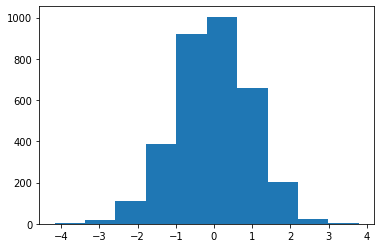

In [44]:
plt.hist(a)
plt.show()

In [45]:
check = (a < 0.75)

In [46]:
check

array([False, False,  True, ...,  True,  True,  True])

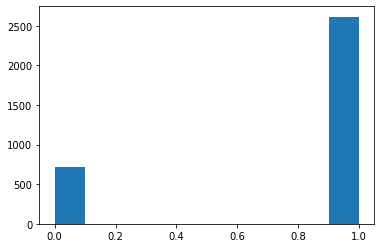

In [47]:
plt.hist(check.astype(int))
plt.show()

In [48]:
training = data[check]
testing = data[~check]

In [49]:
len(training)

2616

In [50]:
len(testing)

717

## Otra forma, con la librería sklearn

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
train, test = train_test_split(data, test_size = 0.2)

In [53]:
len(train)

2666

In [54]:
len(test)

667

## Usando una función de shuffle

In [55]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [56]:
from sklearn.utils import shuffle

In [57]:
data = shuffle(data)

In [58]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id:]

In [59]:
len(train_data)

2499

In [60]:
len(test_data)

834